<a href="https://colab.research.google.com/github/LK2705/sales-eda-project/blob/main/Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/Sales_April_2019.csv")

# Clean data: drop NaN and non-numeric rows
df = df.dropna()
df = df[df['Quantity Ordered'].apply(lambda x: str(x).isdigit())]  # remove bad rows
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

# Create Sales column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Features and target
X = df[['Quantity Ordered', 'Price Each']]
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R² Score:", r2)
print("RMSE:", rmse)



Coefficients: [6.98043247 1.00223489]
Intercept: -7.147318135613489
R² Score: 0.991715873340884
RMSE: 32.41092712970206


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/Sales_April_2019.csv")

# Drop missing rows
df = df.dropna()

# Convert "Order Date" to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date'])   # remove invalid dates

# Extract time features
df['Month'] = df['Order Date'].dt.month
df['DayOfWeek'] = df['Order Date'].dt.dayofweek   # 0 = Monday
df['Hour'] = df['Order Date'].dt.hour

# Convert numeric columns
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df = df.dropna(subset=['Quantity Ordered', 'Price Each'])

# Create target variable (Sales)
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Features: time + order info
X = df[['Month', 'DayOfWeek', 'Hour', 'Quantity Ordered', 'Price Each']]
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2)
print("RMSE:", rmse)


/tmp/ipython-input-1254034918.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


Coefficients: [-0.06691549  0.07242863  0.04033005  6.981733    1.00224306]
Intercept: -7.667334933519214
R² Score: 0.9917126864613194
RMSE: 32.4171607252087


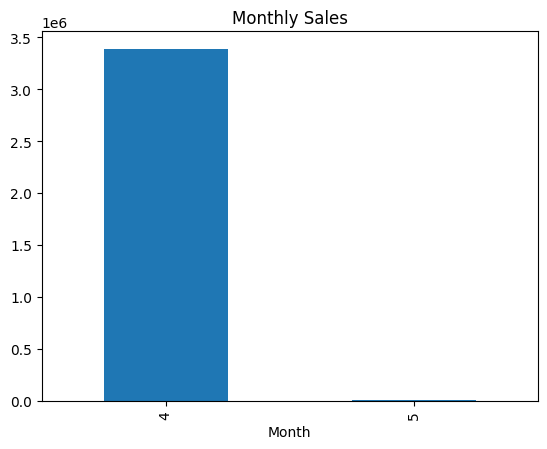

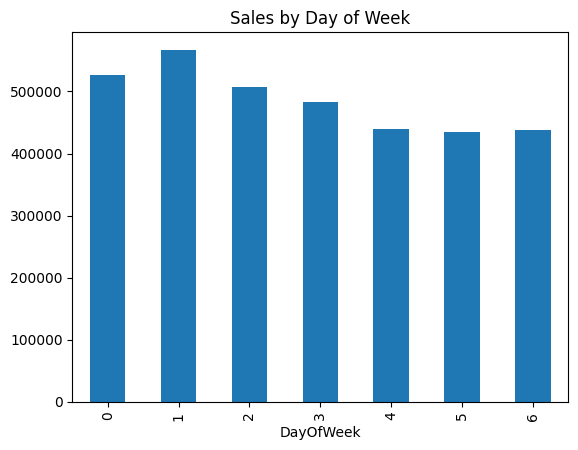

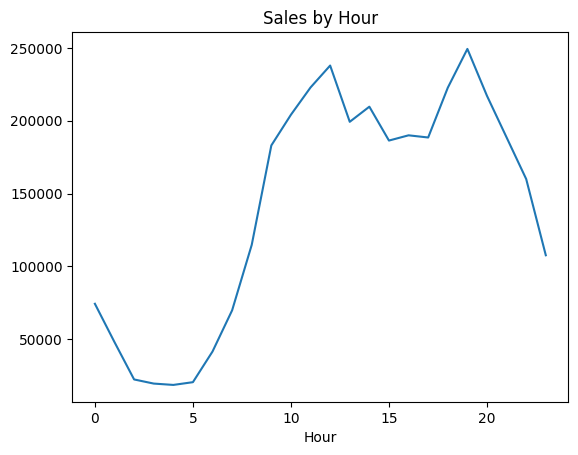

In [5]:
import matplotlib.pyplot as plt

# Sales by month
df.groupby('Month')['Sales'].sum().plot(kind='bar', title="Monthly Sales")
plt.show()

# Sales by day of week
df.groupby('DayOfWeek')['Sales'].sum().plot(kind='bar', title="Sales by Day of Week")
plt.show()

# Sales by hour
df.groupby('Hour')['Sales'].sum().plot(kind='line', title="Sales by Hour")
plt.show()


Accuracy: 0.9994532531437944
Confusion Matrix:
 [[2285    0]
 [   2 1371]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2285
           1       1.00      1.00      1.00      1373

    accuracy                           1.00      3658
   macro avg       1.00      1.00      1.00      3658
weighted avg       1.00      1.00      1.00      3658



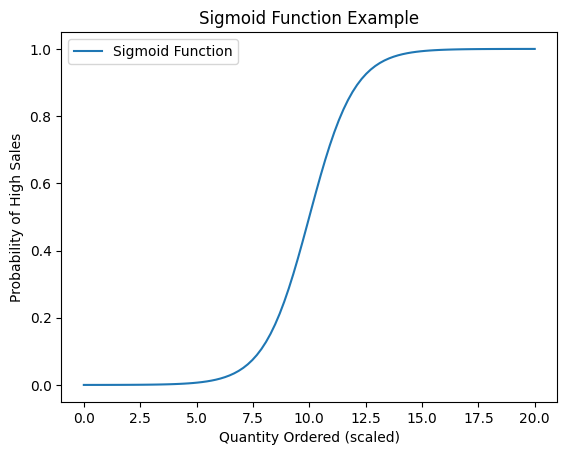

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Sales_April_2019.csv")
df = df.dropna()

# Convert Order Date
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%y %H:%M", errors='coerce')
df = df.dropna(subset=['Order Date'])

# Extract features
df['Month'] = df['Order Date'].dt.month
df['DayOfWeek'] = df['Order Date'].dt.dayofweek
df['Hour'] = df['Order Date'].dt.hour

# Convert numeric
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df = df.dropna(subset=['Quantity Ordered', 'Price Each'])

# Create Sales column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Define target: High (1) or Low (0)
df['HighSales'] = (df['Sales'] >= 100).astype(int)

# Features and target
X = df[['Month', 'DayOfWeek', 'Hour', 'Quantity Ordered', 'Price Each']]
y = df['HighSales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  # sigmoid probabilities

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot sigmoid example (for visualization, using Quantity Ordered vs probability)
from scipy.special import expit

x_vals = np.linspace(0, 20, 100)
sigmoid_vals = expit(x_vals - 10)  # shift around threshold
plt.plot(x_vals, sigmoid_vals, label="Sigmoid Function")
plt.xlabel("Quantity Ordered (scaled)")
plt.ylabel("Probability of High Sales")
plt.title("Sigmoid Function Example")
plt.legend()
plt.show()
